In [1]:
#Importing all the Libraries
import h5py
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pathlib import Path
from datetime import datetime
from collections import namedtuple
import natsort
from natsort import index_natsorted, order_by_index
import tables 

In [2]:
sample_dataset_object = h5py.File('/Users/andyy/Aresty Research Project/DATASETchallenge/layer1.hdf5', 'r')
list(sample_dataset_object.keys())

['OpenData']

In [3]:
sample_dataset = sample_dataset_object['OpenData'][:]

sample_dataset = sample_dataset.transpose()

sample_dataset[0:6][:]

array([[-1.8487875e+01, -8.0184509e+01,  4.8000000e+03,  1.5000000e+03,
         1.0000000e+02,  0.0000000e+00,  1.6600000e+02,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.0000000e+01],
       [-1.8487875e+01, -8.0191986e+01,  4.8000000e+03,  1.5000000e+03,
         1.0000000e+02,  1.5360000e+03,  2.1400000e+02,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.0000000e+01],
       [-1.8487125e+01, -8.0203217e+01,  4.8000000e+03,  1.5000000e+03,
         1.0000000e+02,  3.4210000e+03,  5.0900000e+02,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.0000000e+01],
       [-1.8486378e+01, -8.0217072e+01,  4.8000000e+03,  1.5000000e+03,
         1.0000000e+02,  4.0510000e+03,  7.3800000e+02,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.0000000e+01],
       [-1.8485628e+01, -8.0231659e+01,  4.8000000e+03,  1.5000000e+03,
         1.0000000e+02,  4.3100000e+03,  8.5600000e+02,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.0000000e+

In [4]:
df = pd.DataFrame(sample_dataset)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,-18.487875,-80.184509,4800.0,1500.0,100.0,0.0,166.0,1.0,0.0,0.0,20.0
1,-18.487875,-80.191986,4800.0,1500.0,100.0,1536.0,214.0,1.0,0.0,0.0,20.0
2,-18.487125,-80.203217,4800.0,1500.0,100.0,3421.0,509.0,1.0,0.0,0.0,20.0
3,-18.486378,-80.217072,4800.0,1500.0,100.0,4051.0,738.0,1.0,0.0,0.0,20.0
4,-18.485628,-80.231659,4800.0,1500.0,100.0,4310.0,856.0,1.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
31094,-27.767067,-88.291916,4800.0,1500.0,100.0,4498.0,1161.0,1.0,0.0,0.0,20.0
31095,-27.768936,-88.281433,4800.0,1500.0,100.0,4499.0,1161.0,1.0,0.0,0.0,20.0
31096,-27.770809,-88.272827,4800.0,1500.0,100.0,4501.0,1161.0,1.0,0.0,0.0,20.0
31097,-27.772305,-88.266464,4800.0,1500.0,100.0,4498.0,1195.0,1.0,0.0,0.0,20.0


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,31099.000000,31099.000000,31099.0,31099.0,31099.0,31099.000000,31099.000000,31099.0,31099.0,31099.0,31099.0
mean,-23.114784,-84.830269,4800.0,1500.0,100.0,4488.293945,1543.055908,1.0,0.0,0.0,20.0
std,2.686350,2.670897,0.0,0.0,0.0,245.082092,139.992279,0.0,0.0,0.0,0.0
min,-27.772305,-89.480911,4800.0,1500.0,100.0,0.000000,166.000000,1.0,0.0,0.0,20.0
25%,-25.446520,-87.117702,4800.0,1500.0,100.0,4506.000000,1483.000000,1.0,0.0,0.0,20.0
50%,-23.120359,-84.851791,4800.0,1500.0,100.0,4510.000000,1559.000000,1.0,0.0,0.0,20.0
75%,-20.781288,-82.539291,4800.0,1500.0,100.0,4514.000000,1628.000000,1.0,0.0,0.0,20.0
max,-18.458309,-80.175148,4800.0,1500.0,100.0,4534.000000,1987.000000,1.0,0.0,0.0,20.0


So there are 11 columns of data. The link below describes each column's values and data:
https://www.ic.polimi.it/dataset-description/

Column 0: Corresponds to coordinate X of laser spot (in mm)
Column 1: Corresponds to coordinate Y of laser spot (in mm)
Column 2: Corresponds to Nominal Power (in W)
Column 3: Corresponds to Nominal Scan Speed (in mm/s)
Column 4: Corresponds to Nominal Spot Diameter (in micrometer)
Column 5: Corresponds to Laser Power Current (in W)
Column 6: Corresponds to Signal in GaAs (Photodiode signal, arbitrary unit)
Column 7: Corresponds to IDbulk layer (indicator variable that identified bulk layers (value = 1) and layers that belong to unexposed blocks (value = 0).
Column 8: Corresponds to IDocLayer (identifier of the layers affected by the anomaly, consisting of integers from 0 to 9.
Column 9: Cost for late detection. c_1_cost = 0 for all layers where no anomaly is present, i.e. bulk layers and unexposed layers.
Column 10: Cost for false alarms c_2_cost = 20 for all bulk layers, c_2_cost = 0 for all remaining layers.

So it looks like column 0, column 1, column 5 and column 6 are the ones that are changing layer by layer. 


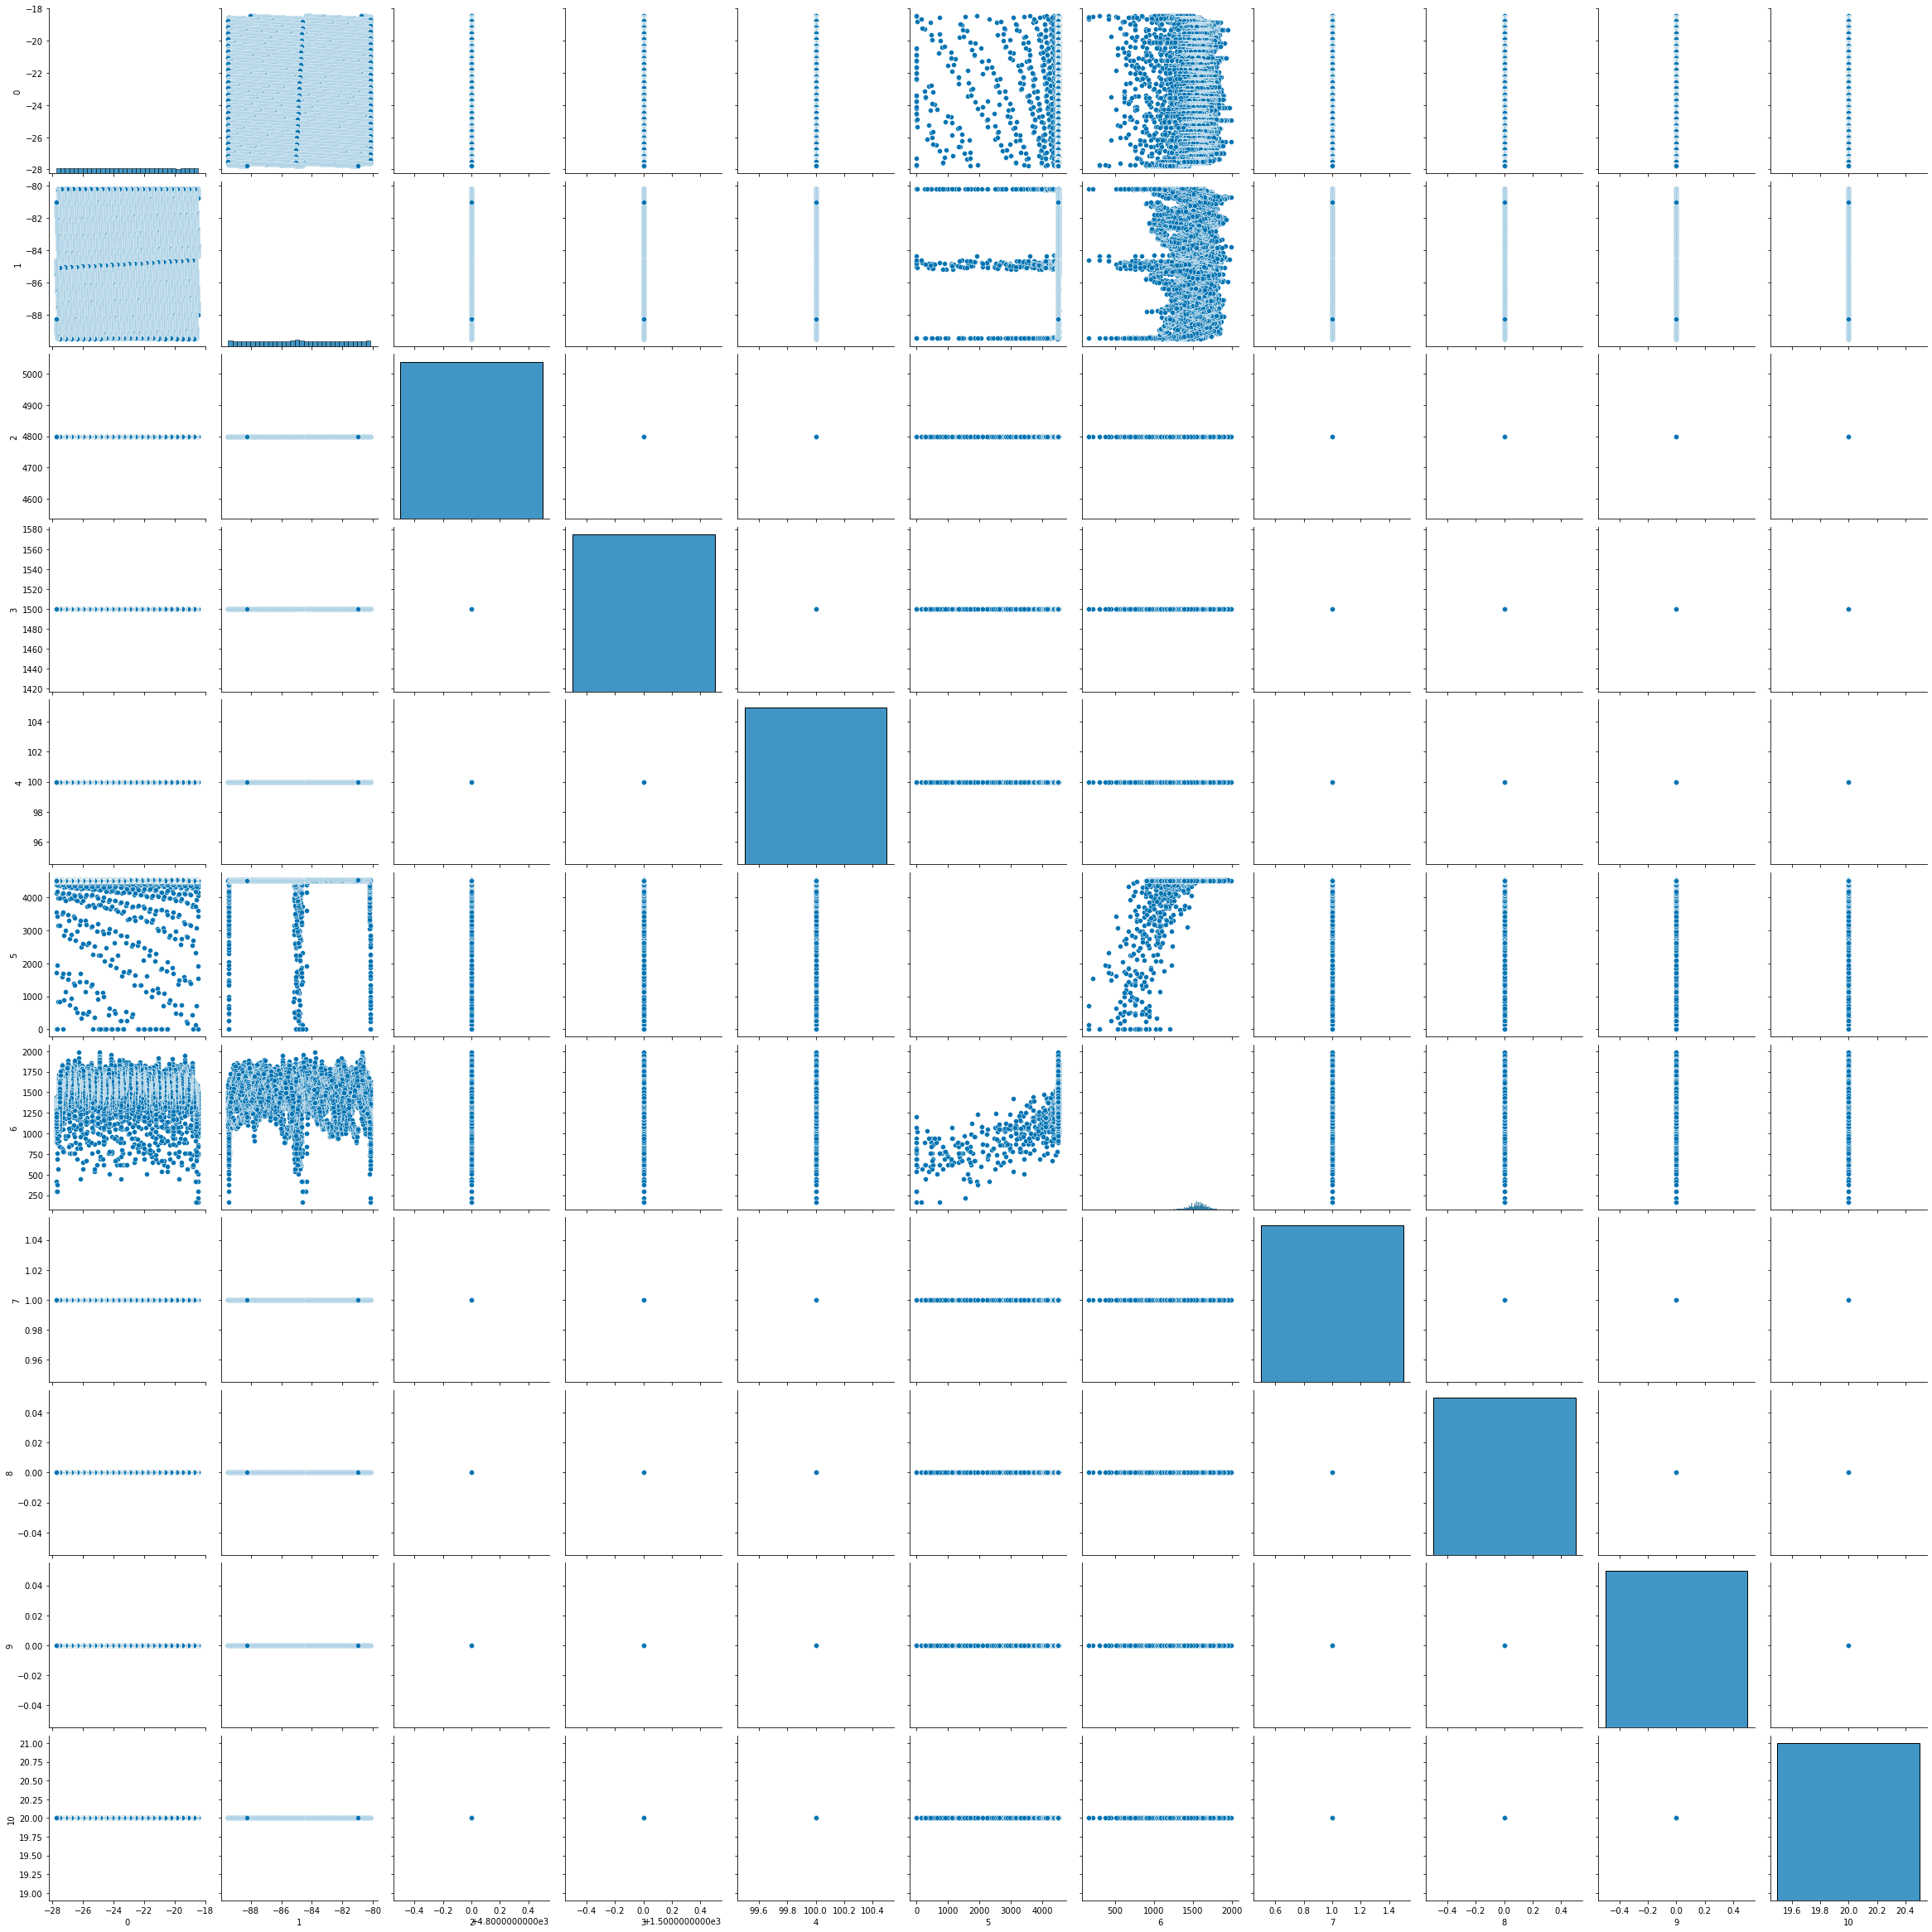

In [7]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

In [14]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import scikeras
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [16]:
dataset = df
# split into input (X) and output (Y) variables
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

KeyError: (slice(None, None, None), slice(0, 4, None))

In [8]:
filename = "/Users/andyy/Aresty Research Project/table_merge.h5"

h5 = h5py.File(filename,'r')

In [11]:
list(h5.keys())

[]

SyntaxError: invalid syntax (Temp/ipykernel_37104/1426104667.py, line 1)